## REGRESIÓN LOGÍSTICA

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import matplotlib.pyplot as plt

df = pd.read_csv("teleco_clean.csv")

y = df['Churn']
X = df.drop(columns=['Churn'])

# Escalado de variables numéricas
scaler = StandardScaler()
X_scaled = X.copy()
numeric_cols = ['tenure', 'TotalCharges', 'MonthlyCharges']
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Métodos de balanceo
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

nearmiss = NearMiss()
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

#Función para evaluar los métodos de balanceo
resultados_balanceo = {}

def evaluar_balanceo(X_resampled, y_resampled, metodo):
    model = LogisticRegression(C=0.1, solver='liblinear', max_iter=2000)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100
    resultados_balanceo[metodo] = (f1, auc)

    print(f"\n🔍 Resultados con {metodo}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred)*100:.2f}%")
    print(f"Recall: {recall_score(y_test, y_pred)*100:.2f}%")
    print(f"F1-Score: {f1:.2f}%")
    print(f"AUC-ROC: {auc:.2f}%")

#Evaluación de los métodos de balanceo
evaluar_balanceo(X_train_ros, y_train_ros, "Sobremuestreo Aleatorio")
evaluar_balanceo(X_train_smote, y_train_smote, "SMOTE")
evaluar_balanceo(X_train_rus, y_train_rus, "Submuestreo Aleatorio")
evaluar_balanceo(X_train_nm, y_train_nm, "NearMiss")

#Selección del mejor método
mejor_metodo = max(resultados_balanceo, key=lambda k: resultados_balanceo[k][0])
print(f"\n🏆 Mejor método: {mejor_metodo} con F1: {resultados_balanceo[mejor_metodo][0]:.2f}% y AUC: {resultados_balanceo[mejor_metodo][1]:.2f}%")

metodos_dict = {
    "Sobremuestreo Aleatorio": (X_train_ros, y_train_ros),
    "SMOTE": (X_train_smote, y_train_smote),
    "Submuestreo Aleatorio": (X_train_rus, y_train_rus),
    "NearMiss": (X_train_nm, y_train_nm),
}

#Asignación del mejor método a X_train_resampled y y_train_resampled
X_train_resampled, y_train_resampled = metodos_dict[mejor_metodo]



🔍 Resultados con Sobremuestreo Aleatorio:
Accuracy: 73.56%
Precision: 50.17%
Recall: 78.61%
F1-Score: 61.25%
AUC-ROC: 82.84%

🔍 Resultados con SMOTE:
Accuracy: 73.13%
Precision: 49.65%
Recall: 76.47%
F1-Score: 60.21%
AUC-ROC: 81.79%

🔍 Resultados con Submuestreo Aleatorio:
Accuracy: 73.06%
Precision: 49.58%
Recall: 79.14%
F1-Score: 60.97%
AUC-ROC: 82.71%

🔍 Resultados con NearMiss:
Accuracy: 69.08%
Precision: 45.15%
Recall: 75.94%
F1-Score: 56.63%
AUC-ROC: 77.19%

🏆 Mejor método: Sobremuestreo Aleatorio con F1: 61.25% y AUC: 82.84%



📌 Resultados con ajuste manual de hiperparámetros:
Accuracy: 73.56%
Precision: 50.17%
Recall: 78.61%
F1-Score: 61.25%
AUC-ROC: 82.84%

📌 Resultados con ajuste automático (GridSearchCV):
Mejores parámetros: {'C': 1, 'solver': 'liblinear'}
Mejor Accuracy en validación cruzada: 77.11%
Accuracy: 73.42%
Precision: 50.00%
Recall: 79.14%
F1-Score: 61.28%
AUC-ROC: 82.89%

🔍 Matriz de confusión del mejor modelo:


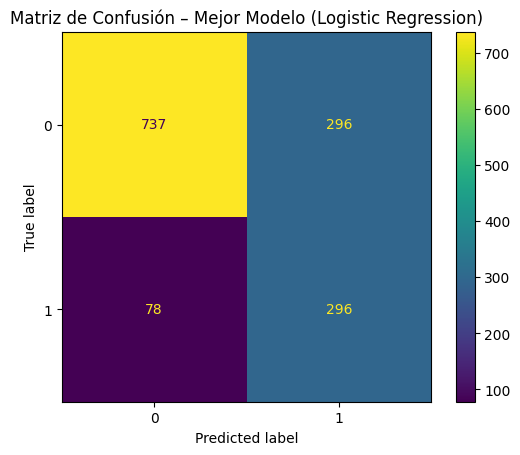

In [2]:
#Entrenamiento del modelo con el mejor método y ajuste manual de hiperparámetros
manual_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=2000)
manual_model.fit(X_train_resampled, y_train_resampled)

y_pred_manual = manual_model.predict(X_test)

print("\n📌 Resultados con ajuste manual de hiperparámetros:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, manual_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")

#Entrenamiento del modelo con el mejor método y ajuste de parámetros automático (GridSearchCV)
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000), parametros, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n📌 Resultados con ajuste automático (GridSearchCV):")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Accuracy en validación cruzada: {grid_search.best_score_ * 100:.2f}%")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_best) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_best) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_best) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]) * 100:.2f}%")

#Matriz de confusión final
print("\n🔍 Matriz de confusión del mejor modelo:")
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Matriz de Confusión – Mejor Modelo (Logistic Regression)")
plt.grid(False)
plt.show()


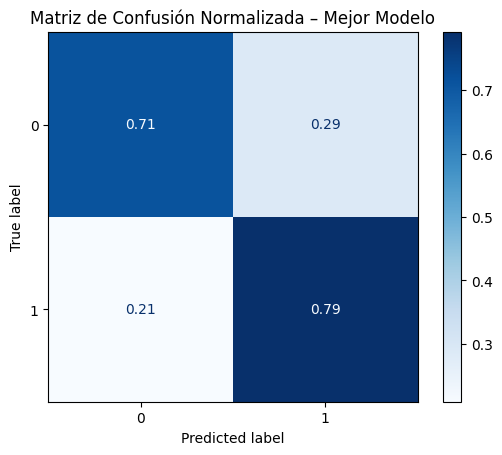

In [3]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=best_model.classes_).plot(cmap="Blues")
plt.title("Matriz de Confusión Normalizada – Mejor Modelo")
plt.grid(False)
plt.show()


### ✅ Conclusión – Matriz de Confusión

El modelo clasifica correctamente al **79 % de los clientes que abandonan**, y al **71 % de los que permanecen**, lo que indica un buen equilibrio. Aunque hay un margen de error, el rendimiento general es sólido para tareas de predicción de churn (baja).


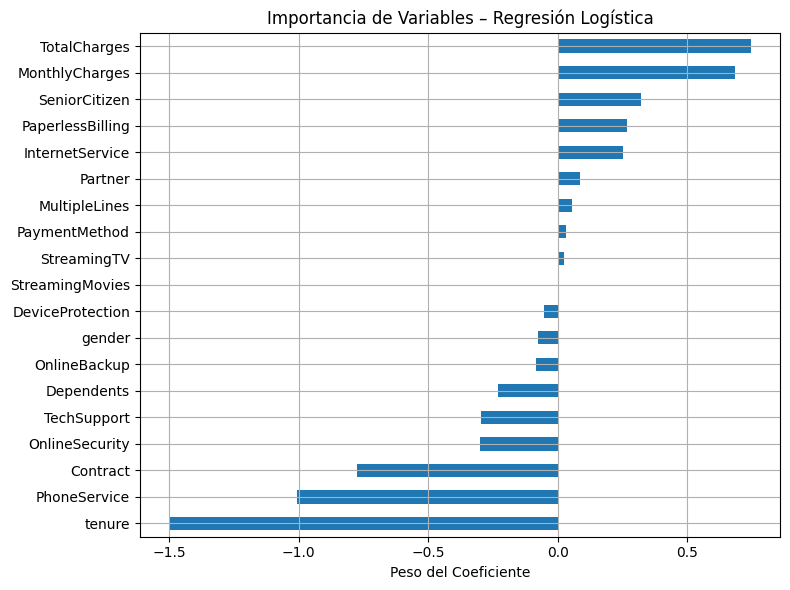

In [4]:
import pandas as pd

coefs = pd.Series(best_model.coef_[0], index=X.columns)
coefs.sort_values().plot(kind="barh", figsize=(8, 6), title="Importancia de Variables – Regresión Logística")
plt.xlabel("Peso del Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ Conclusión – Importancia de Variables

El modelo de regresión logística identifica que variables como `TotalCharges`, `MonthlyCharges` y `SeniorCitizen` aumentan la probabilidad de churn (baja), mientras que factores como la antigüedad del cliente (`tenure`), tener contrato a largo plazo (`Contract`) y contar con servicios de seguridad (`OnlineSecurity`, `TechSupport`) reducen significativamente el riesgo de baja.


# CLASIFICACIÓN CON XGBOOST CLASSIFIER


Random Oversampling
Accuracy: 74.48%
Precision: 51.66%
Recall: 62.57%
F1-Score: 56.59%
AUC-ROC: 80.70%

SMOTE
Accuracy: 74.84%
Precision: 52.18%
Recall: 63.90%
F1-Score: 57.45%
AUC-ROC: 80.71%

Random Undersampling
Accuracy: 70.93%
Precision: 47.15%
Recall: 77.27%
F1-Score: 58.56%
AUC-ROC: 80.13%

NearMiss
Accuracy: 50.32%
Precision: 31.04%
Recall: 71.12%
F1-Score: 43.22%
AUC-ROC: 55.63%

🏆 Mejor método de balanceo: Random Undersampling con F1-Score 58.56% y AUC 80.13%

📌 Resultados finales con GridSearch y Random Undersampling:
Parámetros óptimos: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 73.21%
Precision: 49.75%
Recall: 80.75%
F1-Score: 61.57%
AUC-ROC: 83.11%


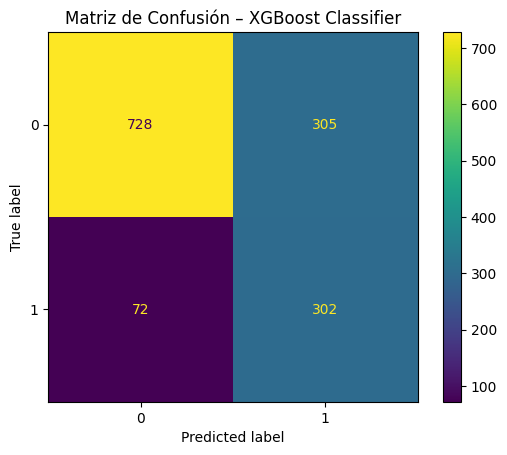

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("teleco_clean.csv")

y = df['Churn']
X = df.drop(columns=['Churn'])

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_train, y_train)

resultados = {}

def evaluar(modelo, X_resampled, y_resampled, metodo):
    modelo.fit(X_resampled, y_resampled)
    y_pred = modelo.predict(X_test)
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1]) * 100
    resultados[metodo] = (f1, auc)
    print(f"\n{metodo}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
    print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
    print(f"F1-Score: {f1:.2f}%")
    print(f"AUC-ROC: {auc:.2f}%")

# Evaluamos con balanceos
modelo_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluar(modelo_base, X_ros, y_ros, "Random Oversampling")
evaluar(modelo_base, X_smote, y_smote, "SMOTE")
evaluar(modelo_base, X_rus, y_rus, "Random Undersampling")
evaluar(modelo_base, X_nm, y_nm, "NearMiss")

mejor_metodo = max(resultados, key=lambda k: resultados[k][0])
print(f"\n🏆 Mejor método de balanceo: {mejor_metodo} con F1-Score {resultados[mejor_metodo][0]:.2f}% y AUC {resultados[mejor_metodo][1]:.2f}%")

X_train_final, y_train_final = {
    "Random Oversampling": (X_ros, y_ros),
    "SMOTE": (X_smote, y_smote),
    "Random Undersampling": (X_rus, y_rus),
    "NearMiss": (X_nm, y_nm)
}[mejor_metodo]

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train_final, y_train_final)

mejor_modelo = grid.best_estimator_
y_pred_final = mejor_modelo.predict(X_test)

print(f"\n📌 Resultados finales con GridSearch y {mejor_metodo}:")
print(f"Parámetros óptimos: {grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_final) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_final) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_final) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, mejor_modelo.predict_proba(X_test)[:, 1]) * 100:.2f}%")

# --------------------
# MATRIZ DE CONFUSIÓN
# --------------------
ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test, y_test)
plt.title("Matriz de Confusión – XGBoost Classifier")
plt.grid(False)
plt.show()


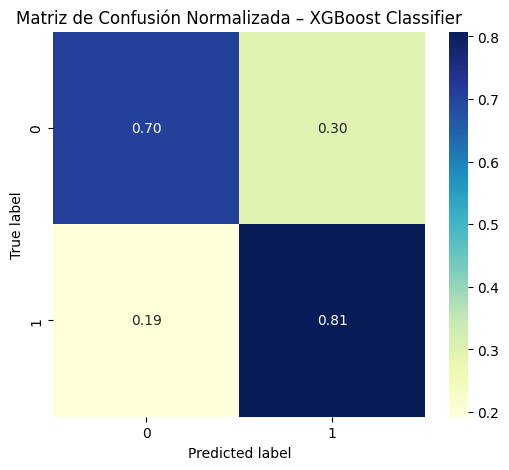

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_final, normalize='true')

# Dibujarla con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Matriz de Confusión Normalizada – XGBoost Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


### Comparación de Modelos: Regresión Logística vs XGBoost Classifier

#### Regresión Logística (Mejor modelo):
- **Recall clase 1 (Churn)**: 0.79 → el 79% de los clientes que abandonan fueron correctamente detectados.
- **Falsos positivos (Clase 0 mal clasificada como 1)**: 29%
- **Modelo equilibrado**, pero con margen de error más elevado en no-churn (clase 0).

#### XGBoost Classifier:
- **Recall clase 1 (Churn)**: 0.81 → mejora en la detección de abandono (2 puntos más que logística).
- **Falsos positivos (Clase 0 mal clasificada como 1)**: 30% → ligero aumento del error en clase 0.
- Modelo más potente, pero no ofrece una **mejora significativa general** frente a la regresión logística para este problema.

---

### Conclusión

Aunque **XGBoost** obtiene un **ligero mejor recall para clientes que abandonan** (lo cual puede ser clave si se prioriza evitar la pérdida de clientes), **la mejora global respecto a la regresión logística es modesta**. Si se valora la interpretabilidad y simplicidad, **la regresión logística sigue siendo una opción sólida**.